In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from scipy.cluster.hierarchy import fcluster

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
# clustering using Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [4]:
Z = linkage(X, 'ward')
print(Z)

[[2.87000000e+02 3.36000000e+02 3.81596727e+00 2.00000000e+00]
 [1.06000000e+02 4.20000000e+02 4.11664267e+00 2.00000000e+00]
 [5.50000000e+01 2.51000000e+02 4.93361024e+00 2.00000000e+00]
 ...
 [1.13000000e+03 1.13200000e+03 6.19607483e+03 8.60000000e+01]
 [1.13100000e+03 1.13300000e+03 8.36899225e+03 4.83000000e+02]
 [1.13400000e+03 1.13500000e+03 1.83711029e+04 5.69000000e+02]]


In [5]:
#reduce dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

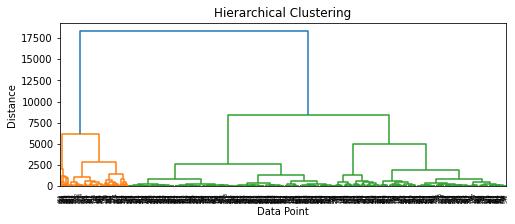

In [6]:
#visualize Hierarchical Clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

Text(0.5, 1.0, 'Hierarchical Clustered Labels')

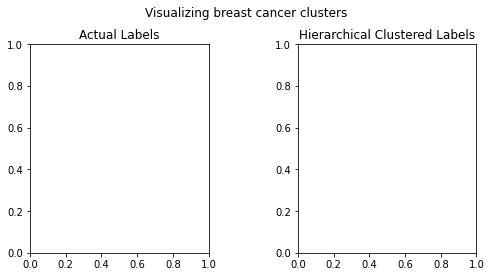

In [7]:
#visualize clusters
max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Hierarchical Clustered Labels')

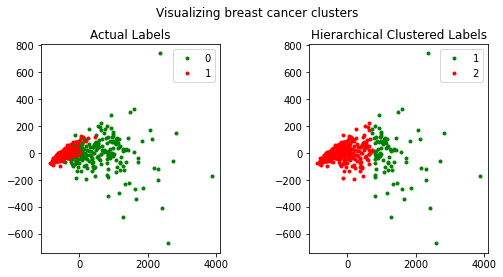

In [8]:
max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Hierarchical Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.') 
    if hc_labels[i] == 1:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if hc_labels[i] == 2:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '2'])